In [139]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# read the input file
data = pd.read_csv("census_2009.dms", delimiter='\t')

In [59]:
data.head()

,State,Town,7_2009
0,Alabama,Abbeville,2930.0
1,Alabama,Adamsville,4782.0
2,Alabama,Addison,709.0
3,Alabama,Akron,433.0
4,Alabama,Alabaster,29861.0


In [60]:
# Check the amount of missing data
data.isnull().sum()

State     0
Town      2
7_2009    6
dtype: int64

In [73]:
# Droped the rows with missing data
data = data.dropna(axis=0)

In [74]:
# Crosscheck that missing data rows are dropped
data.isnull().sum()

State     0
Town      0
7_2009    0
dtype: int64

In [117]:
# Create a function to extract first digit for the "7_2009" column
def extract_first_digit(element):
    return str(element)[0]
# Add a new column with first digit from "7_2009" column
data['first_digit'] = data["7_2009"].apply(extract_first_digit).astype(int)

In [118]:
data.head()

,State,Town,7_2009,first_digit
0,Alabama,Abbeville,2930.0,2
1,Alabama,Adamsville,4782.0,4
2,Alabama,Addison,709.0,7
3,Alabama,Akron,433.0,4
4,Alabama,Alabaster,29861.0,2


In [136]:
# Create a function to check whether a target column validates Benfords law
def check_benford_law(target_col):
    '''This function returns summary stats: digit, count, percent, benford_match '''
    digit_freq = {}
    for values in target_col:
        if values in digit_freq:
            digit_freq[values] = digit_freq[values] + 1
        else:
            digit_freq[values] = 1
    first_digit_distri = {}
    for keys in digit_freq:
        if (digit_freq[keys]/len(target_col))*100 >= 30:
            benford_match = True
        else:
            benford_match = False
        first_digit_distri[keys] = keys,digit_freq[keys],(digit_freq[keys]/len(target_col))*100,benford_match
    return first_digit_distri

In [137]:
#checked benford_law on "first_digit" column
check_benford_law(data["first_digit"])

{2: (2, 3540, 18.151053684048605, False),
 4: (4, 1847, 9.470337896733835, False),
 7: (7, 1166, 5.978567399887197, False),
 1: (1, 5735, 29.405732451417734, False),
 9: (9, 903, 4.630056914320874, False),
 8: (8, 1042, 5.342767779316002, False),
 3: (3, 2341, 12.003281546428754, False),
 6: (6, 1370, 7.02456032405271, False),
 5: (5, 1559, 7.993642003794288, False)}

Text(0.5,1,'First digit frequency')

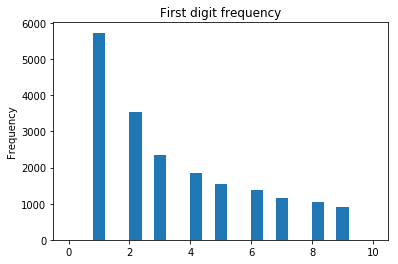

In [143]:
data["first_digit"].plot(kind = "hist", bins=25, range=(0,10)).set_title("First digit frequency")